In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('../static/dataset/data.csv')

In [3]:
data=pd.read_csv('../static/dataset/data.csv')

In [4]:
data.head()


,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
0,30-04-2021 21:00,1,0,0,0,0,0,22.737260,75.875987
1,30-04-2021 21:15,1,0,0,0,0,0,22.720992,75.876083
2,30-04-2021 10:15,0,0,1,0,0,0,22.736676,75.883168
3,30-04-2021 10:15,0,0,1,0,0,0,22.746527,75.887139
4,30-04-2021 10:30,0,0,1,0,0,0,22.769531,75.888772


In [5]:
for col in data:
    print (type(data[col][1]))

<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [6]:
data['timestamp'] = pd.to_datetime(data['timestamp'],errors='coerce')


In [7]:
data['timestamp'] = pd.to_datetime(data['timestamp'], format = '%d/%m/%Y %H:%M:%S')

In [8]:
data['timestamp']

0      2021-04-30 21:00:00
1      2021-04-30 21:15:00
2      2021-04-30 10:15:00
3      2021-04-30 10:15:00
4      2021-04-30 10:30:00
               ...        
8355   2021-03-17 04:50:00
8356   2021-03-17 21:10:00
8357   2021-03-17 12:10:00
8358   2021-03-17 10:35:00
8359   2021-03-17 23:45:00
Name: timestamp, Length: 8360, dtype: datetime64[ns]

In [9]:
column_1 = data.iloc[:,0]

db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear
             })

C:\Users\palle tarun kumar\AppData\Local\Temp\ipykernel_1548\833193866.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  "week": column_1.dt.week,
C:\Users\palle tarun kumar\AppData\Local\Temp\ipykernel_1548\833193866.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  "weekofyear": column_1.dt.weekofyear


In [10]:
dataset1=dataset.drop('timestamp',axis=1)

In [11]:
data1=pd.concat([db,dataset1],axis=1)

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8360 entries, 0 to 8359
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        8272 non-null   float64
 1   month       8272 non-null   float64
 2   day         8272 non-null   float64
 3   hour        8272 non-null   float64
 4   dayofyear   8272 non-null   float64
 5   week        8272 non-null   float64
 6   weekofyear  8272 non-null   float64
 7   act379      8360 non-null   int64  
 8   act13       8360 non-null   int64  
 9   act279      8360 non-null   int64  
 10  act323      8360 non-null   int64  
 11  act363      8360 non-null   int64  
 12  act302      8360 non-null   int64  
 13  latitude    8360 non-null   float64
 14  longitude   8360 non-null   float64
dtypes: float64(9), int64(6)
memory usage: 979.8 KB


In [13]:
data1.dropna(inplace=True)

In [14]:
data1.head()

,year,month,day,hour,dayofyear,week,weekofyear,act379,act13,act279,act323,act363,act302,latitude,longitude
0,2021.0,4.0,30.0,21.0,120.0,17.0,17.0,1,0,0,0,0,0,22.737260,75.875987
1,2021.0,4.0,30.0,21.0,120.0,17.0,17.0,1,0,0,0,0,0,22.720992,75.876083
2,2021.0,4.0,30.0,10.0,120.0,17.0,17.0,0,0,1,0,0,0,22.736676,75.883168
3,2021.0,4.0,30.0,10.0,120.0,17.0,17.0,0,0,1,0,0,0,22.746527,75.887139
4,2021.0,4.0,30.0,10.0,120.0,17.0,17.0,0,0,1,0,0,0,22.769531,75.888772


In [15]:
X=data1.iloc[:,[1,2,3,4,5,6,13,14]].values
y=data1.iloc[:,[7,8,9,10,11,12]].values

**KNN ALGORITHM**


In [16]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

print(knn.score(X_test,y_test))

0.9619335347432024


In [17]:
new_data = pd.DataFrame([[2.0,28.0,21.0,59.0,9.0,9.0,12.120000,	76.680000]],
                            columns=['month','day','hour','dayoftheyear','week', 'weekoftheyear',  'latitude', 'longitude'])

predicted_crimetype = knn.predict(new_data)
crimes=['act379','act13', 'act279','act323','act363','act302']

for i in range(len(predicted_crimetype)):
  if predicted_crimetype[0][i]:
    print("predicted crime:",crimes[i])
    break
else:
  print("No Crime will occur")

No Crime will occur


c:\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'Error Rate')

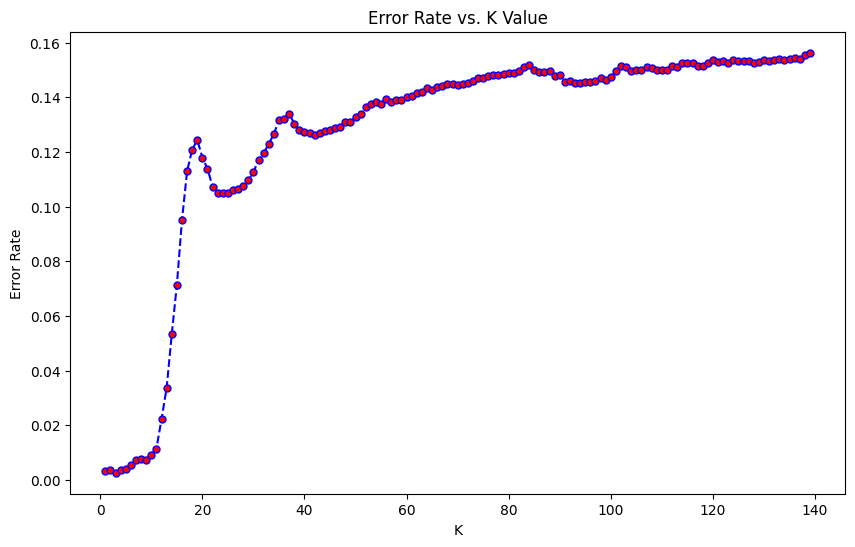

In [18]:
error_rate = []
for i in range(1,140):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,140),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**RANDOMN FOREST ALGORTHM**

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test)

rfc.score(X_test,y_test)





0.9836858006042296

In [20]:
import joblib
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(rfc, f)

In [21]:
predicted_crimetype = rfc.predict(new_data)
for i in range(len(predicted_crimetype)):
  if predicted_crimetype[0][i]:
    print("predicted crime:",crimes[i])
    break
else:
  print("No Crime will occur")

No Crime will occur


c:\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Index(['year', 'month', 'day', 'hour', 'dayofyear', 'week', 'weekofyear',
       'act379', 'act13', 'act279', 'act323', 'act363', 'act302', 'latitude',
       'longitude'],
      dtype='object')


Text(0.5, 0, 'Relative Importance')

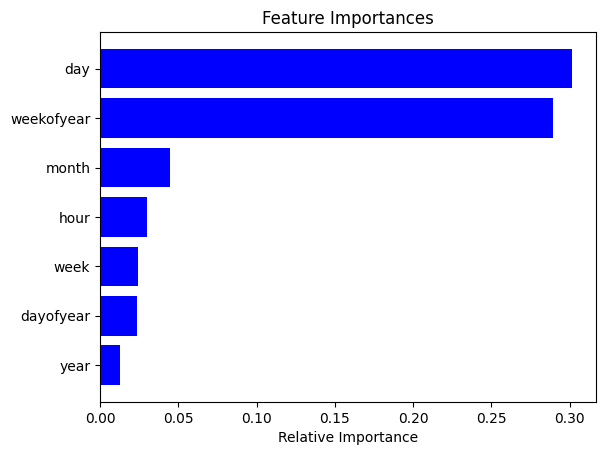

In [22]:
om=rfc.feature_importances_
indices = np.argsort(om)
indices=np.delete(indices,5)
om
features = data1.columns
print(features)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), om[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)


In [24]:
dtree.score(X_test,y_test)

0.9836858006042296

In [25]:
dtree.score(X_train,y_train)

0.9907813208402599

In [26]:
y_pred

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=int64)

In [27]:
treefeatures=dtree.feature_importances_
indices = np.argsort(treefeatures)

In [28]:
treefeatures

array([0.        , 0.02159175, 0.37154593, 0.00658346, 0.03360106,
       0.02576179, 0.28011952, 0.2607965 ])

In [29]:
features = data1.iloc[:,[1,2,3,4,6,10,11]].values

c:\Python310\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 0, 'Relative Importance')

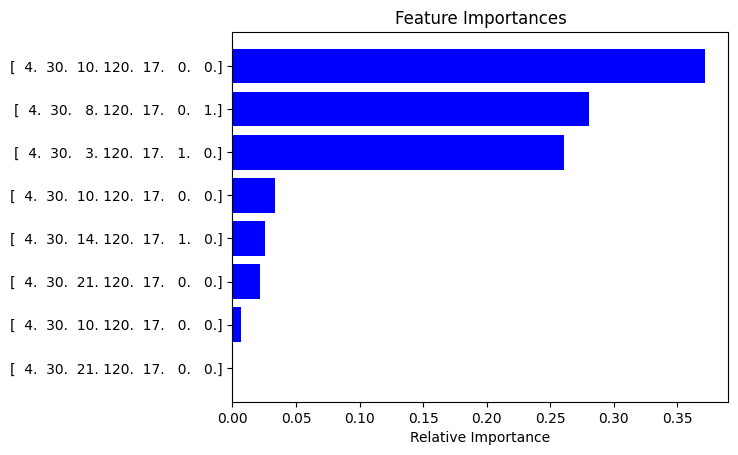

In [30]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), treefeatures[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')